In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.1,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   "hessian_percentile" : 98,
                   "grad_percentile" : 98,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 200,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 3,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (1, 3),
                #"ewc_lambda" : (100,400)
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [5]:
device = get_device(2)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-19 11:44:26,548] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


100%|██████████| 2/2 [00:01<00:00,  1.33it/s]
[I 2024-07-19 11:44:33,733] Trial 0 finished with value: 89.63154394299283 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 2}. Best is trial 0 with value: 89.63154394299283.
100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
[I 2024-07-19 11:44:41,364] Trial 1 finished with value: 90.90847980997628 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 3}. Best is trial 1 with value: 90.90847980997628.
100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
[I 2024-07-19 11:44:48,989] Trial 2 finished with value: 91.34097387173406 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 3}. Best is trial 2 with value: 91.34097387173406.
  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.48it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.48it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
[I 2024-07-19 11:44:54,130] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
[I 2024-07-19 11:45:06,705] Trial 0 finished with value: 89.01306413301658 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 2}. Best is trial 0 with value: 89.01306413301658.
100%|██████████| 3/3 [00:02<00:00,  1.48it/s]
[I 2024-07-19 11:45:19,927] Trial 1 finished with value: 89.16975059382418 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 3}. Best is trial 1 with value: 89.16975059382418.
100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
[I 2024-07-19 11:45:33,319] Trial 2 finished with value: 89.64401425178144 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 3}. Best is trial 2 with value: 89.64401425178144.
  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.47it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.46it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]
[I 2024-07-19 11:45:38,530] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
[I 2024-07-19 11:45:56,678] Trial 0 finished with value: 85.56020585906573 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 2}. Best is trial 0 with value: 85.56020585906573.
100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
[I 2024-07-19 11:46:15,518] Trial 1 finished with value: 85.31275534441801 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 3}. Best is trial 0 with value: 85.56020585906573.
100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
[I 2024-07-19 11:46:34,326] Trial 2 finished with value: 83.78291369754555 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 3}. Best is trial 0 with value: 85.56020585906573.
  0%|          | 0/2 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1505
fc2 : in = 1505, out = 1000
fc3 : in = 1000, out = 10


 50%|█████     | 1/2 [00:00<00:00,  1.46it/s]

In and out sizes :
fc1 : in = 784, out = 1505
fc2 : in = 1505, out = 1000
fc3 : in = 1000, out = 10


100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


## Visualize results

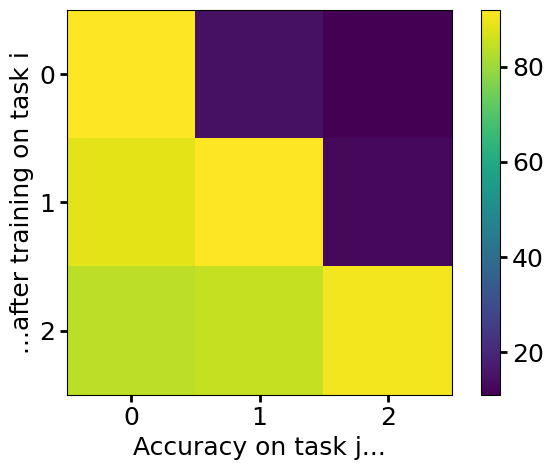

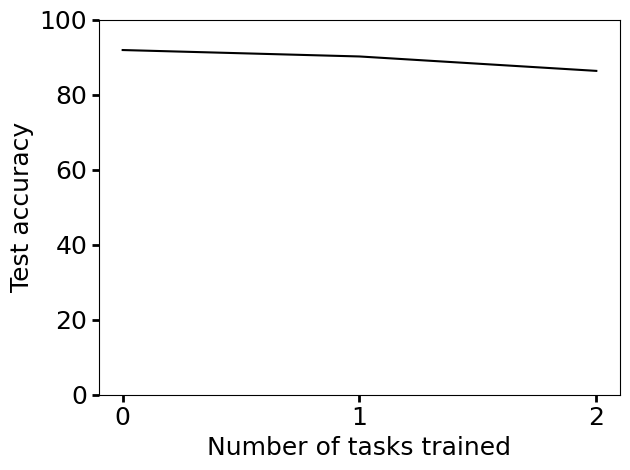

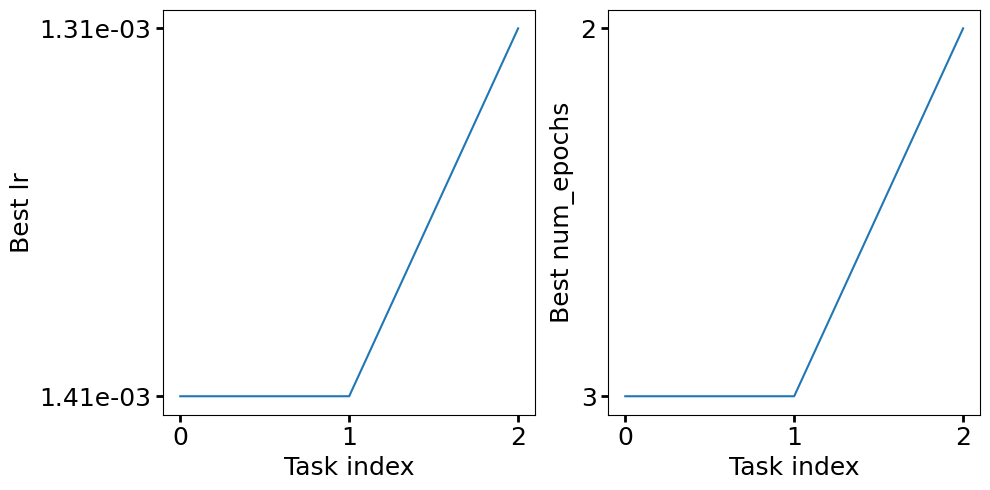

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.43it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.46it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.45it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.41it/s]

In and out sizes :
fc1 : in = 784, out = 1504
fc2 : in = 1504, out = 1000
fc3 : in = 1000, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/2 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1504
fc2 : in = 1504, out = 1000
fc3 : in = 1000, out = 10


 50%|█████     | 1/2 [00:00<00:00,  1.47it/s]

In and out sizes :
fc1 : in = 784, out = 1504
fc2 : in = 1504, out = 1000
fc3 : in = 1000, out = 10


100%|██████████| 2/2 [00:01<00:00,  1.47it/s]



BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.47it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.47it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.47it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.41it/s]

In and out sizes :
fc1 : in = 784, out = 1688
fc2 : in = 1688, out = 1000
fc3 : in = 1000, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/2 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1688
fc2 : in = 1688, out = 1000
fc3 : in = 1000, out = 10


 50%|█████     | 1/2 [00:00<00:00,  1.46it/s]

In and out sizes :
fc1 : in = 784, out = 1688
fc2 : in = 1688, out = 1000
fc3 : in = 1000, out = 10


100%|██████████| 2/2 [00:01<00:00,  1.38it/s]


## Visualize validation

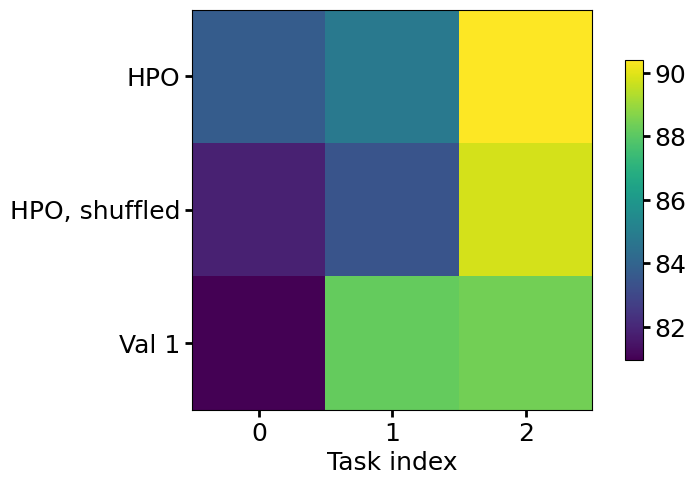

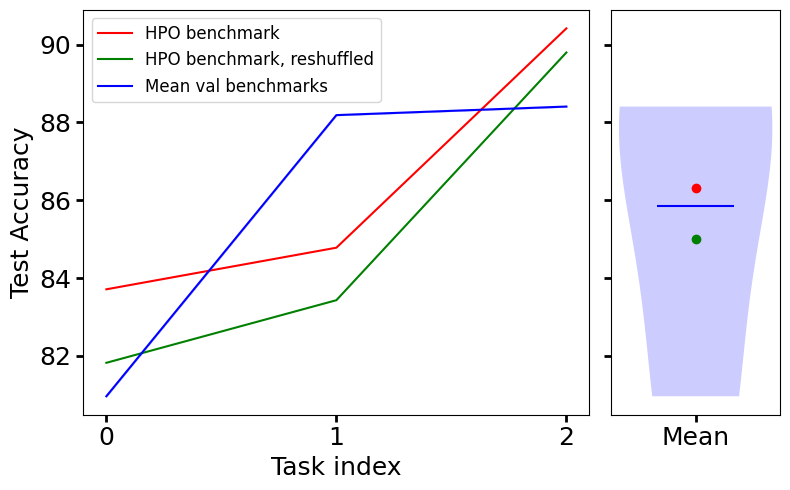

In [10]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [11]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)